In [28]:
import os
import pandas as pd
import math
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pickle as pkl
plt.style.use(os.path.join(mpl.get_configdir(), 'latexstyle.mplstyle'))
sys.path.append('/home/ak/Documents/Research/PaperCode/singlekernelclf')
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from collections import defaultdict
import multiprocessing
import math
import seaborn as sns

In [29]:
from matplotlib.ticker import ScalarFormatter,AutoMinorLocator
import matplotlib as mpl
import matplotlib.pyplot as plt
styleFiles = sorted(os.listdir(mpl.get_configdir()))
styleFileIdx = 1

plt.style.use(os.path.join(mpl.get_configdir(), styleFiles[styleFileIdx]))
#plt.style.use(os.path.join(mpl.get_configdir(), 'plot_style.mplstyle'))


In [30]:
sorted(os.listdir(mpl.get_configdir()))

['latexstyle.mplstyle', 'latexstyle3.mplstyle', 'plot_style.mplstyle']

In [31]:
print(styleFiles[styleFileIdx])

latexstyle3.mplstyle


## pull in all the various utils I need

In [8]:
from fileutils import DataLoader as DataLoader
from fileutils import paths
from fileutils import new_feature_utils as nfu

## where figures will get stored

In [9]:
figuresDestination ='/home/ak/Documents/Research/Papers/HybridLearningPaper/figures/'
symbols = os.listdir(paths('symbols_features'))

alternate_labels_nos = [1, 2, 3, 4, 5, 6]  # we have 7 alternative data types

mainPath = paths('main')

locationPath = os.path.join(mainPath,'ExperimentCommonLocs/')

labelsTitles = [f for f in os.listdir(locationPath) if str('LabelsA') in f]
labelsTitles = [f for f in os.listdir(locationPath) if str('LabelsA') in f]

In [10]:
def labelsPath(mainPath, idx):
    locationPath = os.path.join(mainPath,'ExperimentCommonLocs/')


    
    labelsDictLoc = {'1':'LabelsAlternateOne',
                     '2':'LabelsAlternateTwo',
                     '3':'LabelsAlternateThree',
                     '4':'LabelsAlternateFour',
                     '5':'LabelsAlternateFive',
                     '6':'LabelsAlternateSix',
                     '7':'LabelsAlternateSeven'
                     
                    }
    labelsPath = os.path.join(locationPath, labelsDictLoc[idx])
    
    if os.path.isdir(labelsPath):
        return labelsPath
    else:
        print('Not a valid Label')
        
def symbol_feature_paths(mainPath, symbol):
    """
    mainPath: is the main path created in Dataloader
    symbol
    returns: symbol paths dictionary indexed by keys which are dates
    keys: which are the dates for the symbol's features paths
    """
    
    symbolData = DataLoader(mainPath, symbol)
    hmm_dates_list = sorted(symbolData.hmm_dates_list) ## all hmm model dates
    hmm_date_indx = 0 # pick a model date index
    hmm_date = hmm_dates_list[hmm_date_indx]  # pull out the date
    hmm_features_date_path = os.path.join(symbolData.symbol_features_path, hmm_date)
    symbol_feature_paths = {feature_file.split("_")[5]: os.path.join(hmm_features_date_path, feature_file) for
                            f, feature_file in enumerate(sorted(os.listdir(hmm_features_date_path)))}
    
    return symbol_feature_paths

In [177]:
labelIdx = '5' # pick the label-idx 


# path for the label that has all the symbols
mainLabelPath =labelsPath(mainPath, labelIdx) 
print(mainLabelPath)
# take out all the symbols
symbols = os.listdir(mainLabelPath) 
print(symbols) # list of symbols

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive
['LGEN.L', 'SMIN.L', 'NG.L', 'BLT.L', 'KGF.L', 'PRU.L', 'SHP.L', 'RTO.L', 'BATS.L', 'ULVR.L', 'RR.L', 'CPI.L', 'UU.L', 'RDSa.L', 'RSA.L', 'SPT.L', 'CEY.L', 'RB.L', 'TSCO.L', 'ITV.L', 'PSON.L', 'SDR.L', 'APF.L', 'STAN.L', 'REL.L', 'AZN.L', 'CCL.L', 'SGE.L', 'RDSb.L', 'LLOY.L', 'MKS.L', 'WPP.L', 'CPG.L', 'BARC.L', 'AV.L', 'AAL.L', 'VOD.L', 'MAB.L', 'RBS.L', 'LAND.L']



## pick a symbol

In [172]:
# labelSymbolDict = dict()
# dict_pct_no_move ={}
# symbol = 'AV.L'
# symbol_Main_LabelsPath = os.path.join(mainLabelPath, symbol)
# labelSymbolDict[symbol] =(os.listdir(symbol_Main_LabelsPath))

# ## now for the specific symbol that you have chosen

# symbol_Label_Paths  = {labelSymbolDict[symbol][f].split(".")[0]:os.path.join(symbol_Main_LabelsPath, labelSymbolDict[symbol][f]) for f,_ in enumerate(labelSymbolDict[symbol])}

### functions that can be used

In [178]:
dict_pct_no_move = dict()
labelsValuesDict = dict()

for symbol in symbols:

    symbol_Main_LabelsPath = os.path.join(mainLabelPath, symbol)
    print(symbol_Main_LabelsPath)
    labelSymbolDict[symbol] =(os.listdir(symbol_Main_LabelsPath))

    ## now for the specific symbol that you have chosen

    symbol_Label_Paths  = {labelSymbolDict[symbol][f].split(".")[0]:os.path.join(symbol_Main_LabelsPath, labelSymbolDict[symbol][f]) for f,_ in enumerate(labelSymbolDict[symbol])}    
    print('-------', symbol_Label_Paths,'------------')
    ## make a dictionary that has 

   
    for date in list(symbol_Label_Paths.keys()):

        dataDf = pd.read_csv(symbol_Label_Paths[date])
        label_name = str(dataDf.columns[dataDf.columns.str.contains(pat='label')].values[0])

        labelsValuesDict[date] = dataDf[label_name] # keep the values of the labels only

    df_across_dates = pd.DataFrame.from_dict(labelsValuesDict)
    df_across_dates_values = df_across_dates.apply(pd.Series.value_counts) 
    df_pcts = pd.DataFrame()
    df_pcts[0]= df_across_dates_values.loc[0]/(df_across_dates_values.loc[0]+df_across_dates_values.loc[1]+df_across_dates_values.loc[-1]) #for labels 3,5,6
    #df_pcts[0]= df_across_dates_values.loc[0]/(df_across_dates_values.loc[0]+df_across_dates_values.loc[1]) # for labels 1,2,4
    df_pcts[1] = 1- df_pcts[0]
    dict_pct_no_move[symbol] = df_pcts[0]



/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20180208.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20171030.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20180215.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LGEN.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L
------- {'20180314': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20180314.csv', '20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20170704.csv', '20180329': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20180329.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20170907.csv', '20180320': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20180320.csv', '20180327': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20180327.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20170808.csv', '20180312': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SMIN.L/20180312.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20180208.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20180215.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20170131.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/NG.L/20170710.cs

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20180208.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20171030.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20180215.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BLT.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20180208.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20171030.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20180215.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/KGF.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20180208.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20180409.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20180215.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20170131.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/20170710.csv', '20170124': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PRU.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20170704.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20170907.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20180403.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20170710.csv', '20170703': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20170703.csv', '20170824': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20170824.csv', '20170811': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/20170811.csv', '20170804': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SHP.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L
------- {'20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20171030.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20170907.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20171002.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20170131.csv', '20171025': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BATS.L/20171025.csv', '20170124': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L
------- {'20180314': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20180314.csv', '20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20170704.csv', '20170609': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20170609.csv', '20180329': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20180329.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20170907.csv', '20180320': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20180320.csv', '20180327': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20180327.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ULVR.L/20170808.csv', '20180312': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L
------- {'20180314': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20180314.csv', '20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20170704.csv', '20180329': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20180329.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20170907.csv', '20180320': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20180320.csv', '20180327': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20180327.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20170808.csv', '20180312': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20180312.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RR.L/20180403.cs

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20180208.csv', '20170209': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20170209.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20171030.csv', '20170203': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20170203.csv', '20170221': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20170221.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPI.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L
------- {'20180314': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20180314.csv', '20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20170704.csv', '20170609': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20170609.csv', '20180329': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20180329.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20170907.csv', '20180320': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20180320.csv', '20180327': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20180327.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20170808.csv', '20180312': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/UU.L/20180312.cs

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20180208.csv', '20171219': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20171219.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20180215.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RDSa.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20170704.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20170907.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20180403.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20170710.csv', '20170703': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20170703.csv', '20170824': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20170824.csv', '20170811': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/20170811.csv', '20170804': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RSA.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20180208.csv', '20170209': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20170209.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20171030.csv', '20170203': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20170203.csv', '20170221': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20170221.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CEY.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20180208.csv', '20171219': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20171219.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20180409.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20180215.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20170131.csv', '20171228': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RB.L/20171228.cs

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L
------- {'20180314': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20180314.csv', '20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20170704.csv', '20180329': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20180329.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20170907.csv', '20180320': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20180320.csv', '20180327': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20180327.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20170808.csv', '20180312': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/TSCO.L/20180312.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20180208.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20171030.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20180215.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/ITV.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20180208.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20180409.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20180215.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20170131.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/PSON.L/20170710.csv', '20170124': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20170704.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20170907.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20180403.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20170710.csv', '20170703': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20170703.csv', '20170824': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20170824.csv', '20170811': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/20170811.csv', '20170804': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SDR.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L
------- {'20180314': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20180314.csv', '20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20170704.csv', '20180329': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20180329.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20170907.csv', '20180320': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20180320.csv', '20180327': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20180327.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20170808.csv', '20180312': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/STAN.L/20180312.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20170704.csv', '20171219': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20171219.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20170907.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20180403.csv', '20171228': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20171228.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20170710.csv', '20170124': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/20170124.csv', '20170703': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/REL.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170704.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170907.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170808.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170131.csv', '20170124': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170124.csv', '20170703': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170703.csv', '20170824': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170824.csv', '20170811': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170811.csv', '20170804': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/20170804.csv', '20170118': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AZN.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20170704.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20170907.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20180403.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20170710.csv', '20170703': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20170703.csv', '20170824': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20170824.csv', '20170811': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/20170811.csv', '20170804': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/SGE.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20180208.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20171030.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20180215.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LLOY.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20180208.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20180215.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/20170131.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MKS.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L
------- {'20180314': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20180314.csv', '20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20170704.csv', '20170609': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20170609.csv', '20180329': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20180329.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20170907.csv', '20180320': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20180320.csv', '20180327': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20180327.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/20170808.csv', '20180312': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/WPP.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20180208.csv', '20170209': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20170209.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20171030.csv', '20170203': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20170203.csv', '20170221': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20170221.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/CPG.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L
------- {'20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170907.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170808.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170131.csv', '20170124': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170124.csv', '20170824': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170824.csv', '20170811': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170811.csv', '20170804': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170804.csv', '20170118': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170118.csv', '20170901': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/BARC.L/20170901.csv', '20170818': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170704.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170808.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170131.csv', '20170710': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170710.csv', '20170124': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170124.csv', '20170703': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170703.csv', '20170824': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170824.csv', '20170811': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170811.csv', '20170804': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/20170804.csv', '20170717': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/AAL.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20180208.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20171030.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20180215.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/20171002.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/MAB.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20180208.csv', '20171219': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20171219.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20180409.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20180215.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20170808.csv', '20180403': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20180403.csv', '20170131': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/20170131.csv', '20171228': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/RBS.L/

/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L
------- {'20170704': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20170704.csv', '20180226': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20180226.csv', '20180208': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20180208.csv', '20171030': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20171030.csv', '20180409': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20180409.csv', '20170907': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20170907.csv', '20180215': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20180215.csv', '20171004': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20171004.csv', '20170808': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateFive/LAND.L/20170808.csv', '20171002': '/media/ak/DataOnly/ExperimentCommonLocs/LabelsAlternateF

In [179]:
df_across_dates_values

,20170704,20180226,20180208,20171030,20180409,20170907,20180215,20171004,20170808,20171002,...,20171227,20171229,20171221,20171214,20171208,20171211,20171206,20171218,20171215,20170502
-1.0,165,592,609,393,319,368,479,462,170,394,...,229,128,274,479,469,436,431,310,345,215
0.0,566,819,1312,585,823,633,1098,553,332,680,...,1082,648,1569,1320,4299,1436,2150,1627,1880,1193
1.0,196,517,582,385,251,464,463,369,192,407,...,231,179,338,433,463,384,507,322,341,144


In [175]:
#pd.DataFrame.from_dict(dict_pct_no_move['CPI.L']).median(axis=0)

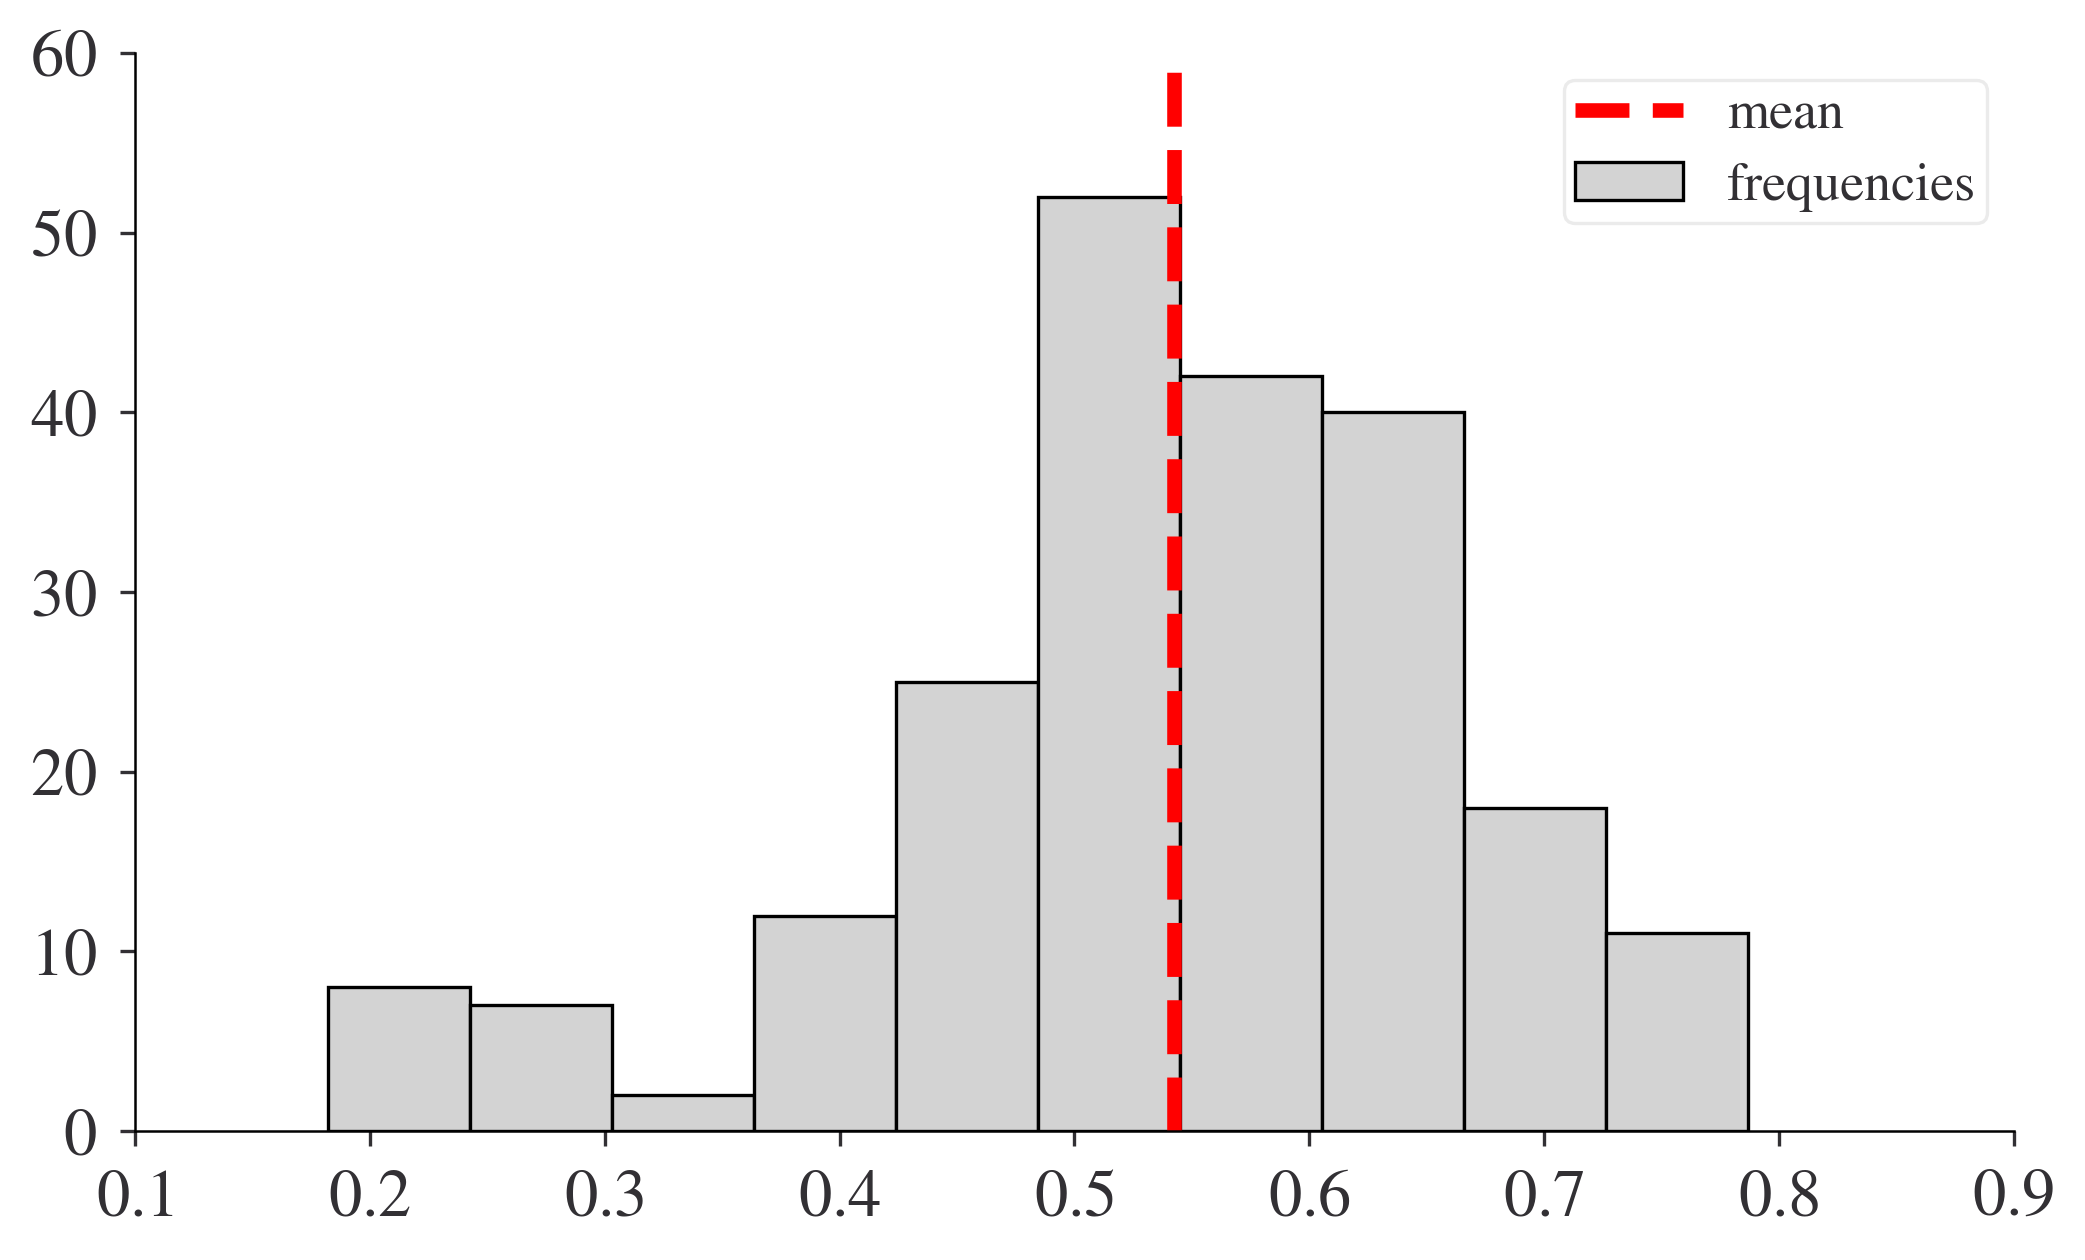

In [180]:
df_across_time = pd.DataFrame.from_dict(dict_pct_no_move).median(axis=1)
#f, ax = plt.subplots(figsize = (20 ,7))
df_across_time.plot.hist(label='frequencies', color = 'lightgrey')
_ = plt.axvline(x = df_across_time.mean(), color='r', linewidth = 3.5, linestyle="--", label='mean' )


plt.ylabel('')
title = label_name+'_across_time_histo_new_label_'+str(labelIdx)+'.png'
target_path = os.path.join(figuresDestination, title)
plt.legend()
plt.savefig(target_path)

In [141]:
df_across_symbols = pd.DataFrame.from_dict(dict_pct_no_move).median(axis=0)
df_across_symbols.mean()

0.07923080820560079

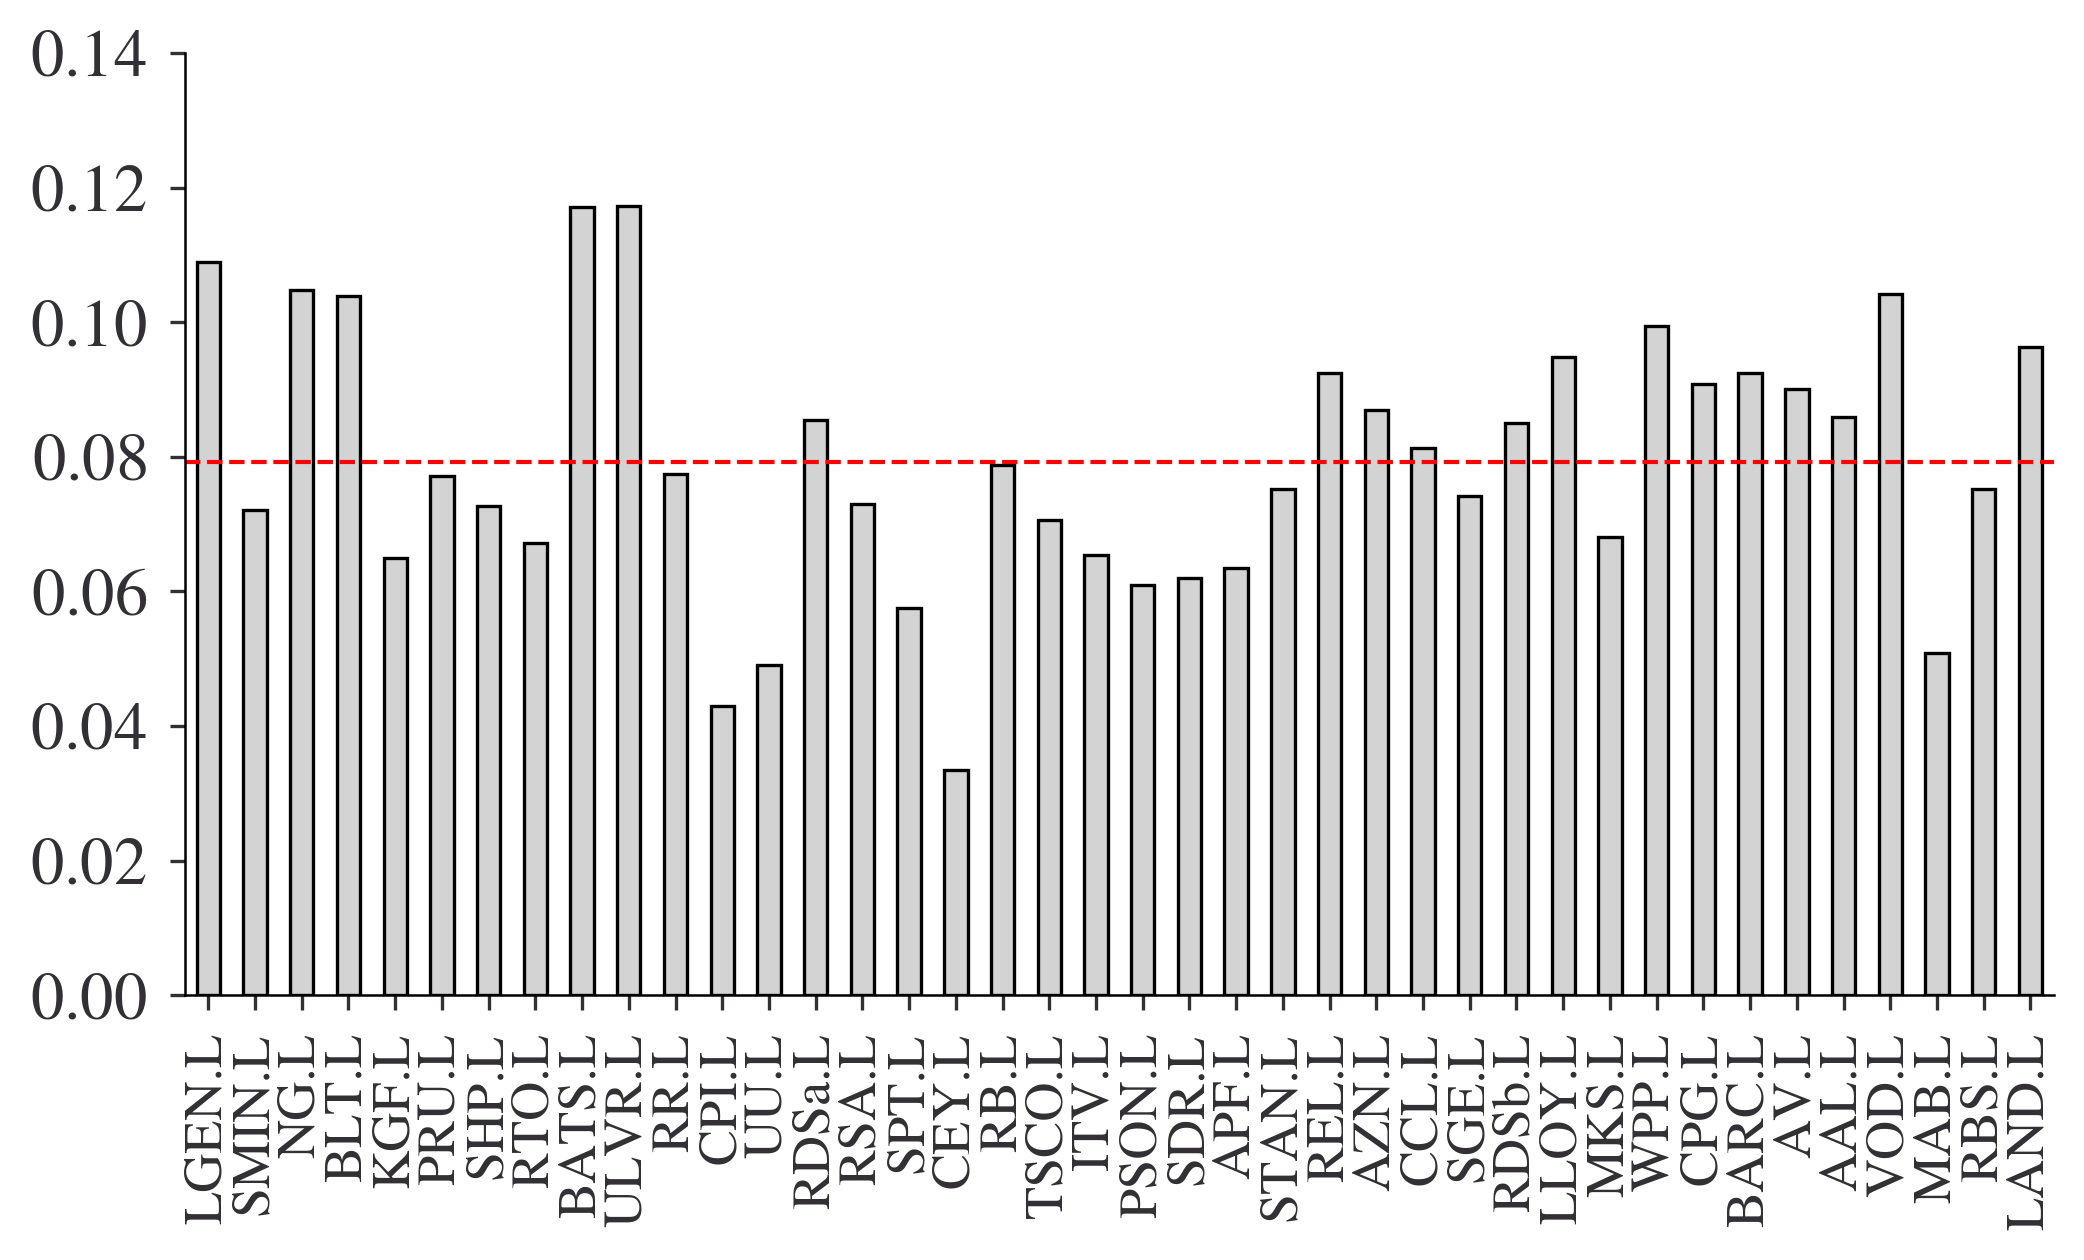

In [151]:
#f, ax = plt.subplots(figsize = (18 ,5))
df_across_symbols.plot.bar(label ='percentage inside range', color ='lightgrey')
_=plt.axhline(y = df_across_symbols.mean(), color='r', linewidth = 1, linestyle="--", label='mean' )
_ = ax.legend(fontsize = 14)
plt.xticks(fontsize = 13)
title = label_name+'_across_symbols_bar_plot_n'+str(labelIdx)+'.png'
target_path = os.path.join(figuresDestination, title)

plt.savefig(target_path)

In [116]:
print(df_across_symbols.describe().to_latex())

\begin{tabular}{lr}
\toprule
{} &          0 \\
\midrule
count &  40.000000 \\
mean  &   0.956104 \\
std   &   0.062948 \\
min   &   0.644518 \\
25\%   &   0.961423 \\
50\%   &   0.974334 \\
75\%   &   0.986346 \\
max   &   0.997133 \\
\bottomrule
\end{tabular}



In [54]:
def labels_dicionaries(keys, alternate_labels_nos):
    label_date_dict = defaultdict(dict)
    label_names = dict()
    value_counts_dict =dict()
    
    for label_idx in alternate_labels_nos:    
        for key_idx, key in enumerate(keys): # this is a date
            labels_file_path = os.path.join(symbolData.symbol_specific_label_path(label_idx), key + ".csv")
            labels = pd.read_csv(labels_file_path) # load all the labels
            label_name = str(labels.columns[labels.columns.str.contains(pat='label')].values[0]) #strip the name
            labels_values = labels[label_name] # keep the values of the labels only
            label_date_dict[key][label_idx] = (labels_values) # tag label values into a dictionary
            label_names[label_idx] = label_name # keep the label names
            value_counts_dict[key] =pd.DataFrame.from_dict(label_date_dict[key]).apply(pd.Series.value_counts) # do a simple count of numbers of each label values
    return label_date_dict, value_counts_dict, label_names

In [55]:

def open_pickle_filepath(pickle_file):
    pickle_to_file = pickle.load(open(pickle_file, "rb"), encoding='latin1')

    return pickle_to_file



def relative_movements(df, label_idx):
    global proportionMoveNoMove
    
    if math.isnan(df[label_idx][-1]) == True:
        
        proportionMoveNoMove = df[label_idx][1]/df[label_idx][0] # move to no move
    
    elif math.isnan(df[label_idx][0]) == True:
        
        proportionMoveNoMove = df[label_idx][1]/df[label_idx][-1] # move up versus move down
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][1]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][0]) == True:
        pass
    
    elif math.isnan(df[label_idx][0]) == True and math.isnan(df[label_idx][1]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) == True and math.isnan(df[label_idx][1]) == True and math.isnan(df[label_idx][0]) == True:
        pass
    
    elif math.isnan(df[label_idx][-1]) != True and math.isnan(df[label_idx][1]) != True and math.isnan(df[label_idx][0]) != True:
        
        proportionMoveNoMove = (df[label_idx][1] + df[label_idx][-1]) /df[label_idx][0] # move to no move
                
    return proportionMoveNoMove
    

#### various inputs- will need to iterate over

In [56]:
def symbol_feature_paths(mainPath, symbol):
    """
    mainPath: is the main path created in Dataloader
    symbol
    returns: symbol paths dictionary indexed by keys which are dates
    keys: which are the dates for the symbol's features paths
    """
    
    symbolData = DataLoader(mainPath, symbol)
    hmm_dates_list = sorted(symbolData.hmm_dates_list) ## all hmm model dates
    hmm_date_indx = 0 # pick a model date index
    hmm_date = hmm_dates_list[hmm_date_indx]  # pull out the date
    hmm_features_date_path = os.path.join(symbolData.symbol_features_path, hmm_date)
    symbol_feature_paths = {feature_file.split("_")[5]: os.path.join(hmm_features_date_path, feature_file) for
                            f, feature_file in enumerate(sorted(os.listdir(hmm_features_date_path)))}

   
    return symbol_feature_paths
# for key in keys:  # <--- this is the label key in older versions of the code!


# all sorts of analysis needed for the label distribution
# for every key, which represents a data, label_date_dict[key], we get a dictionary that has 7 keys (1-7) which represent the keys for the labels. For some random date/"key", you get:
# label_date_dict[key] = {{1: 0 0.0 1 0.0 2 0.0 3 0.0 4 0.0 ... }

# label_date_dict[key].keys() = dict_keys([1, 2, 3, 4, 5, 6, 7])

# value_counts, returns basically the number of 0, 1, -1 in the dataframe and label_names- plain names

            
def relative_movement_calculation(keys):

    label_date_dict, value_counts_dict, label_names =labels_dicionaries(keys, alternate_labels_nos)
    relative_movement_dict  = defaultdict(dict)
    for key in keys:
        for label_no in alternate_labels_nos:
            print('##############Date:',key, '################ & Label: ', label_no)
            relative_movement_dict[key][label_no]  = (relative_movements(value_counts_dict[key], label_no))
           # print(relative_movement_dict)
        return relative_movement_dict

In [57]:

# for symbol in symbols:
symbolData = DataLoader(mainPath, symbol)
paths = symbol_feature_paths(mainPath, symbol)
keys = sorted(list(paths.keys()))
print(keys)


#     ## main piece of code is here ## 

# relative_movement_dict = relative_movement_calculation(keys)
# relative_movement_dict.keys()
# dfDatesLabels = pd.DataFrame.from_dict(relative_movement_dict, orient= "index")

# df_across_dates[str(symbol)] = dfDatesLabels #.median(axis=0)

['20170117', '20170118', '20170119', '20170120', '20170123', '20170124', '20170125', '20170126', '20170127', '20170130', '20170131', '20170703', '20170704', '20170705', '20170706', '20170707', '20170710', '20170711', '20170712', '20170713', '20170714', '20170717', '20170718', '20170719', '20170720', '20170721', '20170724', '20170725', '20170726', '20170727', '20170728', '20170731', '20170801', '20170802', '20170803', '20170804', '20170807', '20170808', '20170809', '20170810', '20170811', '20170814', '20170815', '20170816', '20170817', '20170818', '20170821', '20170822', '20170823', '20170824', '20170825', '20170829', '20170830', '20170831', '20170901', '20170904', '20170905', '20170906', '20170907', '20170908', '20170911', '20170912', '20170913', '20170914', '20170915', '20170918', '20170919', '20170920', '20170921', '20170922', '20170925', '20170926', '20170927', '20170928', '20170929', '20171002', '20171003', '20171004', '20171005', '20171006', '20171009', '20171010', '20171011', '20

In [58]:
relative_movement_dict = relative_movement_calculation(keys)
relative_movement_dict.keys()
dfDatesLabels = pd.DataFrame.from_dict(relative_movement_dict, orient= "index")

##############Date: 20170117 ################ & Label:  1
##############Date: 20170117 ################ & Label:  2
##############Date: 20170117 ################ & Label:  3
##############Date: 20170117 ################ & Label:  4
##############Date: 20170117 ################ & Label:  5
##############Date: 20170117 ################ & Label:  6


In [61]:
label_date_dict = defaultdict(dict)
label_names = dict()
value_counts_dict =dict()
    
for label_idx in alternate_labels_nos:    
    for key_idx, key in enumerate(keys): # this is a date
        labels_file_path = os.path.join(symbolData.symbol_specific_label_path(label_idx), key + ".csv")
        labels = pd.read_csv(labels_file_path) # load all the labels
        label_name = str(labels.columns[labels.columns.str.contains(pat='label')].values[0]) #strip the name
        labels_values = labels[label_name] # keep the values of the labels only
        label_date_dict[key][label_idx] = (labels_values) # tag label values into a dictionary
        label_names[label_idx] = label_name # keep the label names
        value_counts_dict[key] =pd.DataFrame.from_dict(label_date_dict[key]).apply(pd.Series.value_counts) # do a simple count of numbers of each label values

In [ ]:
relative_movement_dict

In [62]:
df_across_dates

,20170704,20180226,20180208,20171030,20180409,20170907,20180215,20171004,20170808,20171002,...,20171027,20170815,20170719,20171020,20180404,20170801,20170914,20170721,20180410,20180413
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


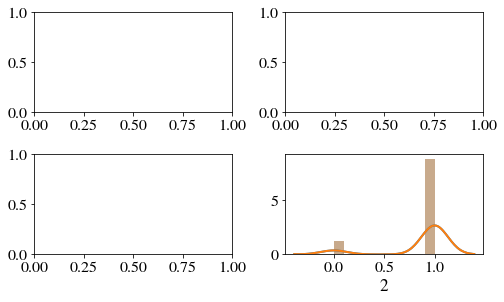

In [63]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, constrained_layout = True)
ax1 =sns.distplot(df_across_dates.iloc[1], bins =10)
ax2 =sns.distplot(df_across_dates.iloc[2], bins =10)

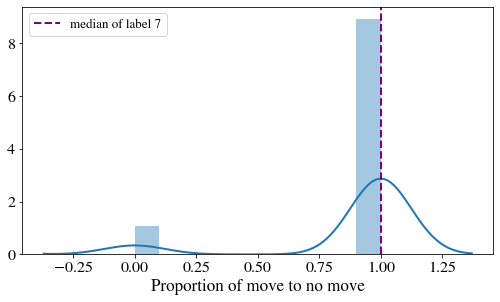

In [64]:
_=sns.distplot(df_across_dates.iloc[0], bins =10)
plt.axvline(df_across_dates.iloc[6].median(), linestyle = '--', color = 'purple', label ='median of label 7')
_=plt.xlabel("Proportion of move to no move")
plt.legend()
# figName = os.path.join(figuresDestination, 'Labe71Distribution.png')
# plt.savefig(figName , dpi =150 )

In [65]:
df_across_dates.head(4)

,20170704,20180226,20180208,20171030,20180409,20170907,20180215,20171004,20170808,20171002,...,20171027,20170815,20170719,20171020,20180404,20170801,20170914,20170721,20180410,20180413
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [66]:
df_across_dates.median(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4985    NaN
4986    NaN
4987    NaN
4988    NaN
4989    NaN
Length: 4990, dtype: float64

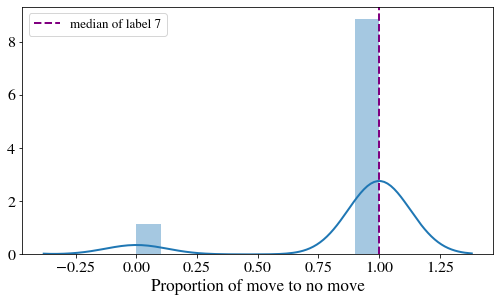

In [68]:
_=sns.distplot(df_across_dates.iloc[7], bins =10)
plt.axvline(df_across_dates.iloc[7].median(), linestyle = '--', color = 'purple', label ='median of label 7')
_=plt.xlabel("Proportion of move to no move")
plt.legend()
# figName = os.path.join(figuresDestination, 'Label7Distribution.png')
# plt.savefig(figName , dpi =150 )

TypeError: 'AxesSubplot' object does not support item assignment

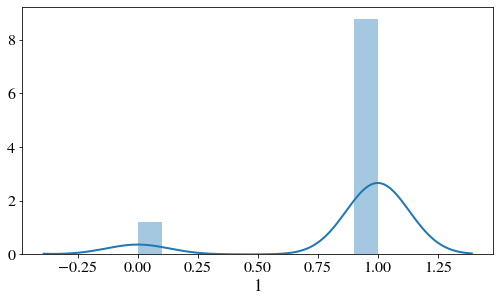

In [69]:
ax[0, 0] = sns.distplot(df_across_dates.iloc[1], bins =10)

In [70]:
pd.options.display.float_format = '{:.2}'.format
#print(df_across_dates.to_latex(index=True))
df_across_dates = df_across_dates
df_across_dates.median(axis=1).T

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
        ..
4985   nan
4986   nan
4987   nan
4988   nan
4989   nan
Length: 4990, dtype: float64